# Семинар 5: визуализация

На этом семинаре мы поговорим про то, как в python можно делать разные графики и визуализации.

## 1. Строим картинку в matplotlib

In [2]:
%matplotlib inline

`matplotlib inline` - позволяет рисовать графики прямо в ноутбуке

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# зададим параметры рисуемых нами графиков, например, размер
plt.rcParams['figure.figsize'] = (16, 8)

Простейший график: две линии на плоскости

In [4]:
import math

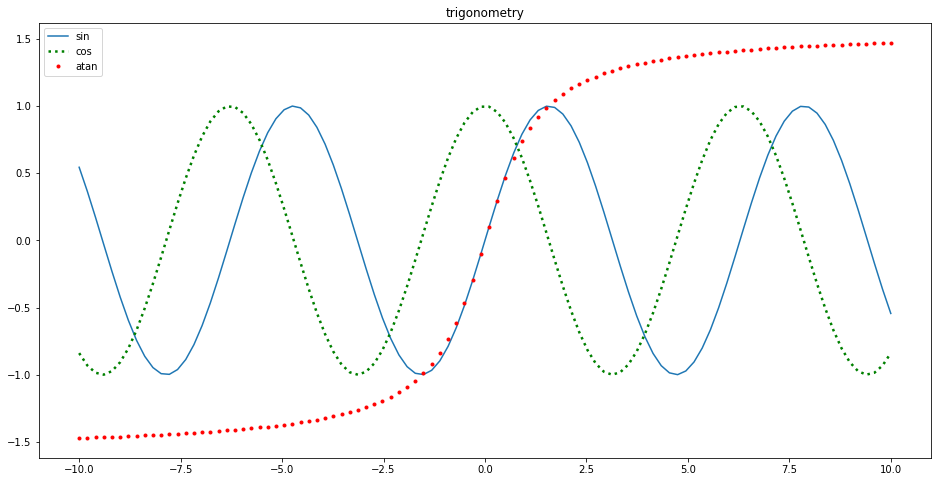

In [5]:
X = np.linspace(-10, 10, 100)
Y1 = np.sin(X)
Y2 = np.cos(X)
Y3 = [math.atan(x) for x in X]

plt.title('trigonometry') #заголовок графика
plt.plot(X, Y1) #первая линия на графике
plt.plot(X, Y2, linewidth=2.5, linestyle=":", color="green")
plt.plot(X, Y3, marker=".", linestyle = '',color="red")
plt.legend(["sin", "cos", "atan"])
plt.show()

Нарисуйте черным график куба и желтым график экспоненты на отрезке $[-е; e]$

In [ ]:
# ваш код

### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

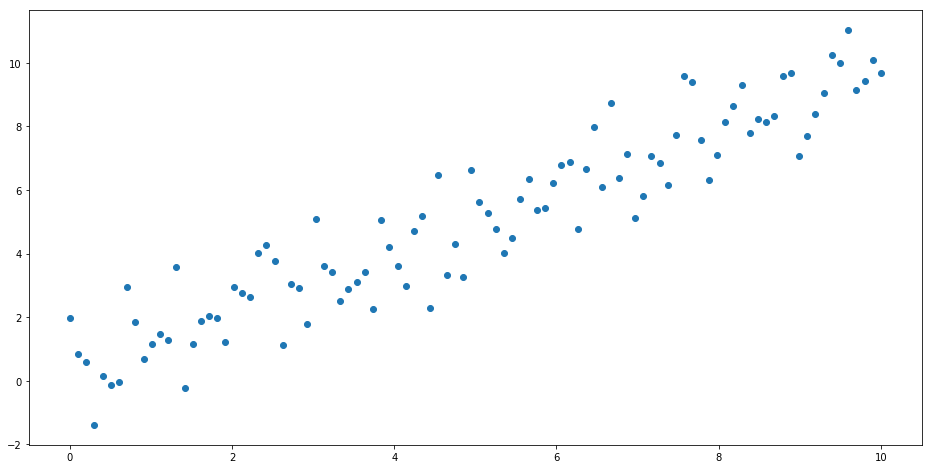

In [7]:
X = np.linspace(0, 10, 100)
Y = X + np.random.normal(size = 100)
plt.scatter(X, Y)

(0, 10)

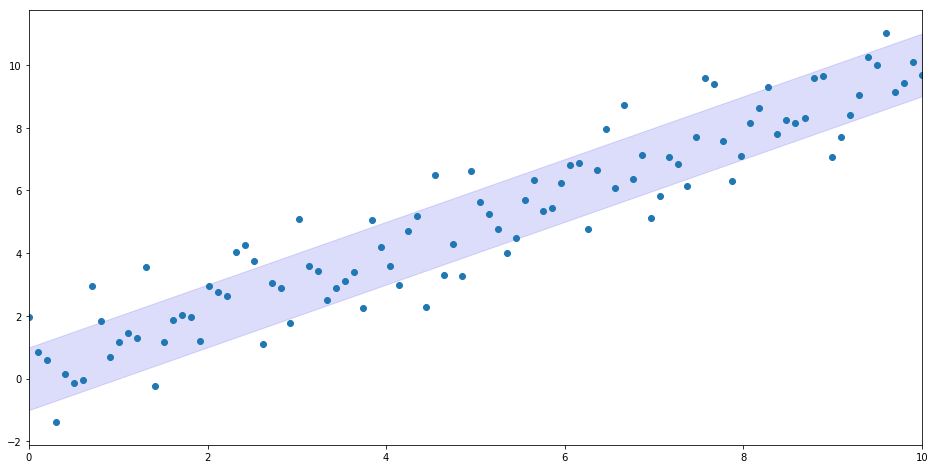

In [8]:
plt.fill_between(X, X-1, X+1, color = [(.1,.1,.9)], alpha = .15)
plt.scatter(X, Y)
plt.xlim((0,10))

А теперь попробуем потыкать в настоящие данные.

## 2. Настоящие данные

In [6]:
import pandas as pd

In [7]:
youtube = pd.read_csv("youtube_data.csv", sep = "\t")

In [8]:
youtube.head()

,title,caption,categoryId,commentCount,definition,description,dislikeCount,duration,license,licensedContent,...,comment_mean_len_symbol,comment_mean_len_word,comment_negative_mean_prob,comment_negative_share,commentators_uniq,comments_emoji_max,comments_emoji_mean,comments_emoji_share,comments_obscene_cnt,words_obscene_cnt
0,"""#2Маши ""Свободные линии""",False,10,34.0,hd,ITUNES - https://itun.es/ru/0YzI_,43.0,PT3M30S,youtube,True,...,59.440000,8.840000,0.635410,0.480000,24.0,9.0,1.000000,0.320000,0.0,0.0
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",False,10,NaN,sd,NEW OFFICIAL VIDEO\r\n2010,690.0,PT3M42S,youtube,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",False,10,26.0,sd,Посвящается Майклу Джексону...\r\nCover-versio...,10.0,PT5M46S,youtube,False,...,120.000000,19.291667,0.725987,0.750000,23.0,13.0,0.666667,0.125000,0.0,0.0
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",False,10,12.0,sd,"Сергей Лазарев, La Toya Jackson, Ани Лорак, Т...",7.0,PT6M16S,youtube,False,...,81.818182,11.545455,0.736776,0.727273,11.0,13.0,1.181818,0.090909,0.0,0.0
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",False,10,46.0,sd,official video,19.0,PT3M,youtube,True,...,43.735294,8.617647,0.596008,0.441176,33.0,23.0,0.794118,0.088235,1.0,1.0


In [9]:
youtube.dtypes

title                          object
caption                          bool
categoryId                      int64
commentCount                  float64
definition                     object
description                    object
dislikeCount                  float64
duration                       object
license                        object
licensedContent                  bool
likeCount                     float64
music_style                    object
performer                      object
publicStatsViewable              bool
publishedAt                    object
tags                           object
video_id                       object
viewCount                     float64
comment_max_len_symbol        float64
comment_max_len_word          float64
comment_mean_len_symbol       float64
comment_mean_len_word         float64
comment_negative_mean_prob    float64
comment_negative_share        float64
commentators_uniq             float64
comments_emoji_max            float64
comments_emo

Добавим несколько столбцов, которые будут отражать _возраст видео_ в более удобной форме

In [10]:
from datetime import datetime

def get_ts(timestamp_iso8601):
    timestamp = datetime.strptime(timestamp_iso8601, "%Y-%m-%dT%H:%M:%S.%fZ")
    return timestamp.timestamp()

def get_age(published_at, now = "2019-03-15T00:00:00.000Z"):
    age = datetime.strptime(now, "%Y-%m-%dT%H:%M:%S.%fZ") -  datetime.strptime(published_at, "%Y-%m-%dT%H:%M:%S.%fZ")
    return int(age.total_seconds() / 86400)

In [11]:
youtube['publishedAt_ts'] = youtube.publishedAt.map(get_ts)
youtube['video_age'] = youtube.publishedAt.map(get_age)

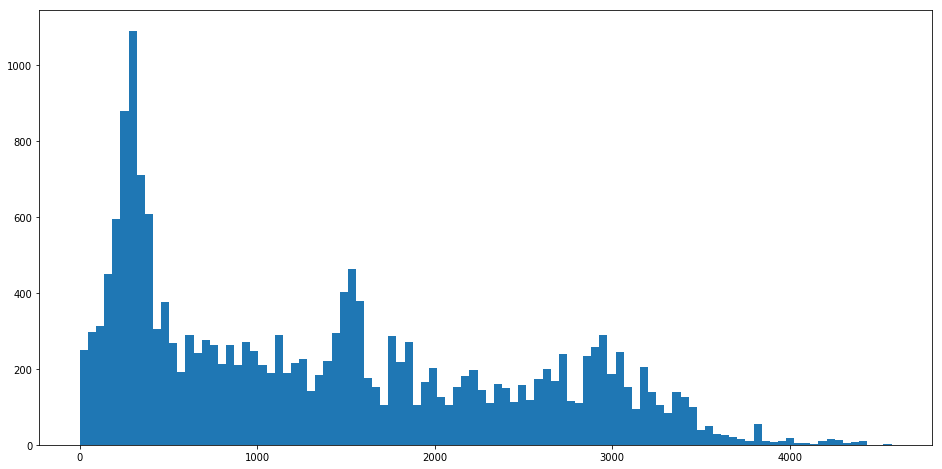

In [12]:
plt.hist(youtube.video_age, bins=100)
plt.show()

In [13]:
youtube.video_age.describe()

count    19124.000000
mean      1389.772642
std       1054.261698
min          0.000000
25%        378.000000
50%       1213.000000
75%       2218.000000
max       4574.000000
Name: video_age, dtype: float64

Рассмотрим детальнее, когда что выкладывали

In [16]:
def get_year(x):
    return datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ").year

In [17]:
youtube['year'] = youtube.publishedAt.map(get_year)

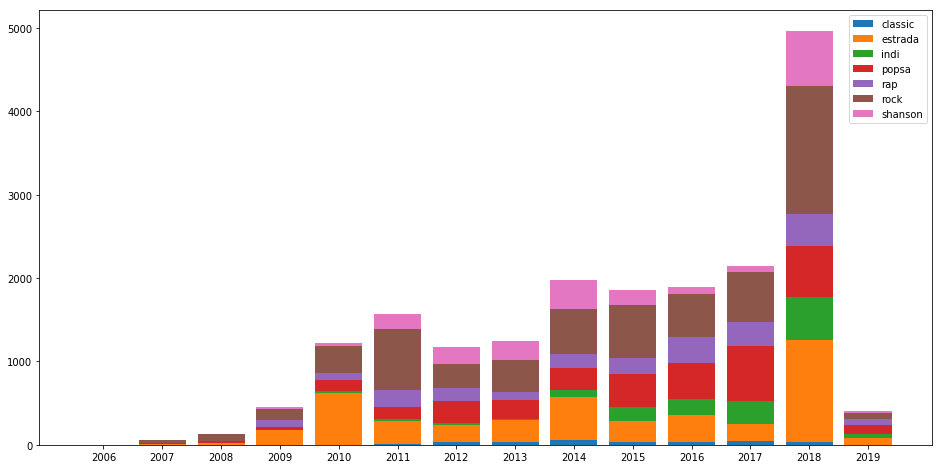

In [18]:
genres = []
years = sorted(youtube.year.unique())
ind = np.arange(len(years))
bottom = np.zeros_like(years)
for genre, data in youtube.groupby("music_style"):
    genres.append(genre)
    videosByYear = data.year.value_counts()
    videosByYear = [videosByYear.get(year, 0) for year in years]
    plt.bar(ind, videosByYear, bottom=bottom)
    bottom += videosByYear
plt.xticks(ind, years)

plt.legend(genres)

можно рисовать сразу несколько графиков в одном окне.

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


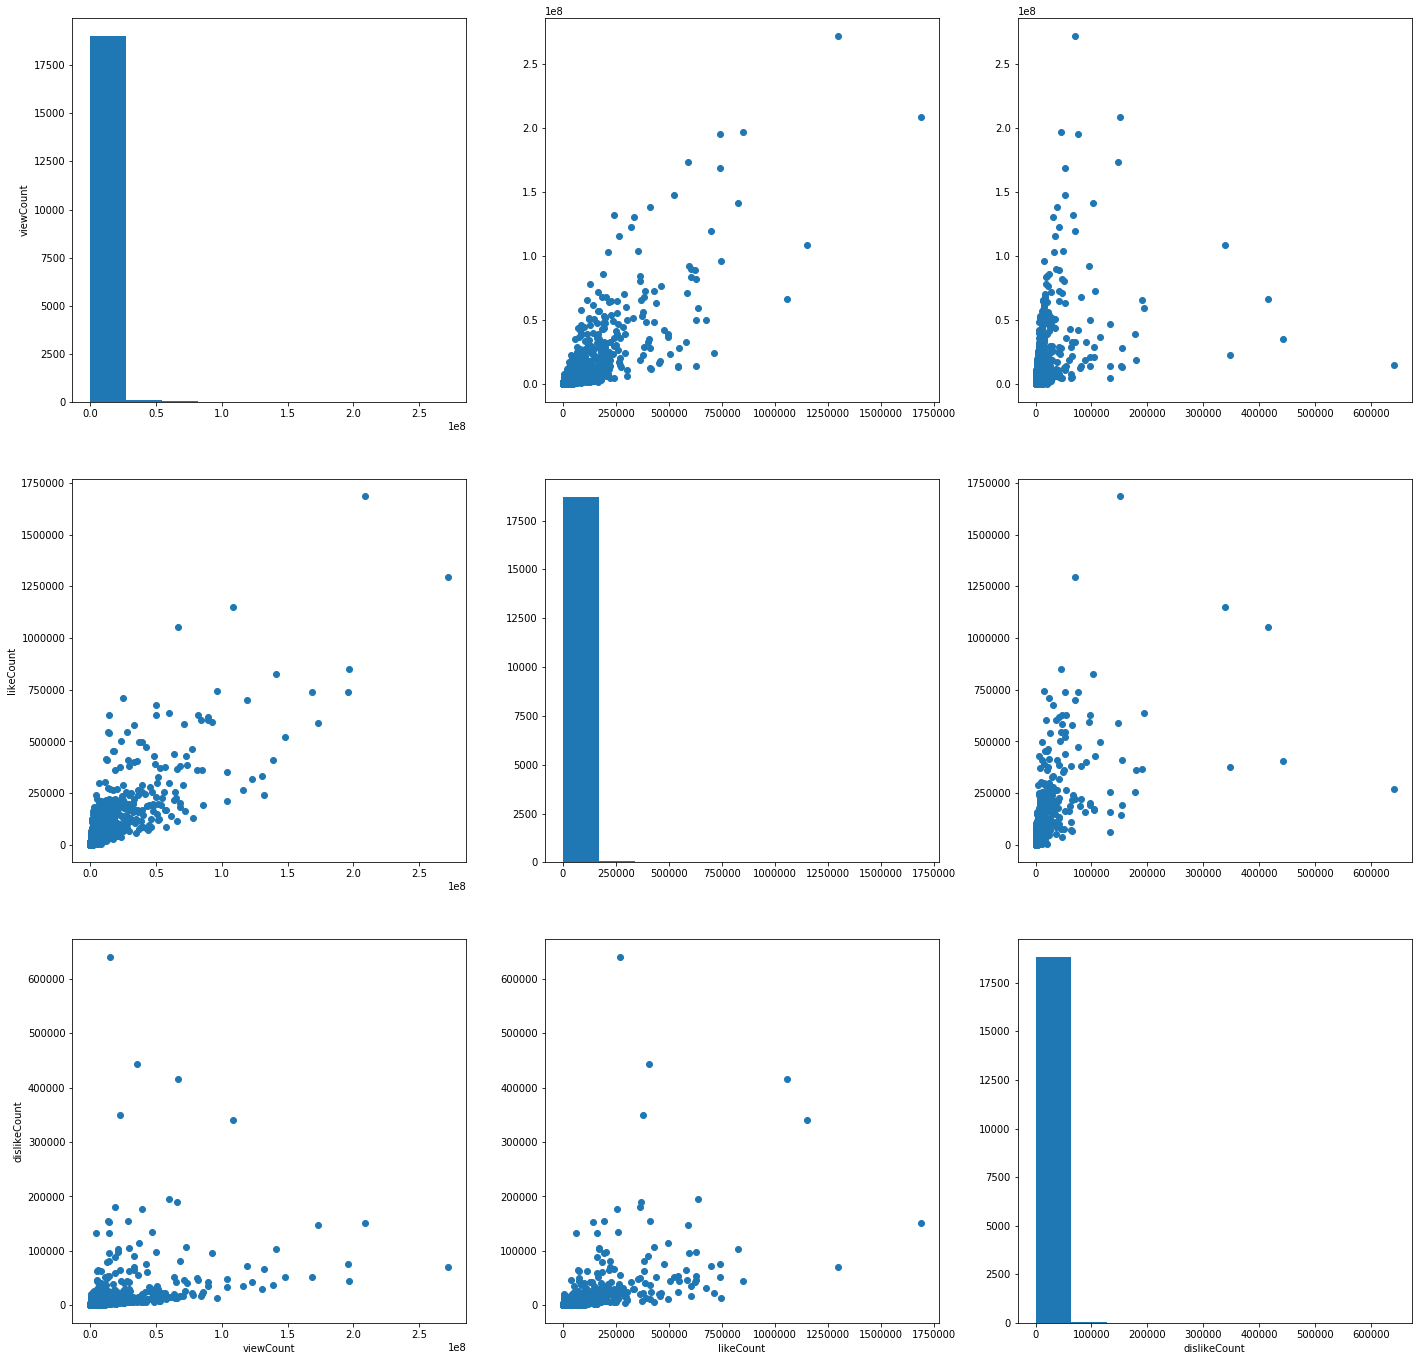

In [19]:
fig, axis = plt.subplots(nrows=3, ncols=3, figsize=(24, 24), sharey=False, sharex=False)
columns = ['viewCount', 'likeCount', 'dislikeCount']
for i in range(3):
    axis[i,i].hist(youtube[columns[i]])
    for j in range(i+1, 3):
        axis[i,j].scatter(youtube[columns[j]], youtube[columns[i]])
        axis[j,i].scatter(youtube[columns[i]], youtube[columns[j]])
for i in range(3):
    axis[i, 0].set_ylabel(columns[i])
    axis[2, i].set_xlabel(columns[i])
fig.show()

Доработайте код выше, чтоб вывести разные жанры разными цветами. Добавьте логарифмическую шкалу, чтоб данные не сливались

In [ ]:
# ваш код

### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## 3. Другие виды графиков

### BoxPlot

Некоторые называют его "ящик с усиками"

![](https://upload.wikimedia.org/wikipedia/commons/3/32/Densityvsbox.png)

Представляет из себя визуальное описание одномерной величины: отражает медиану, верхнюю и нижнюю квартиль, выбросы и минимальное и максимальное значения

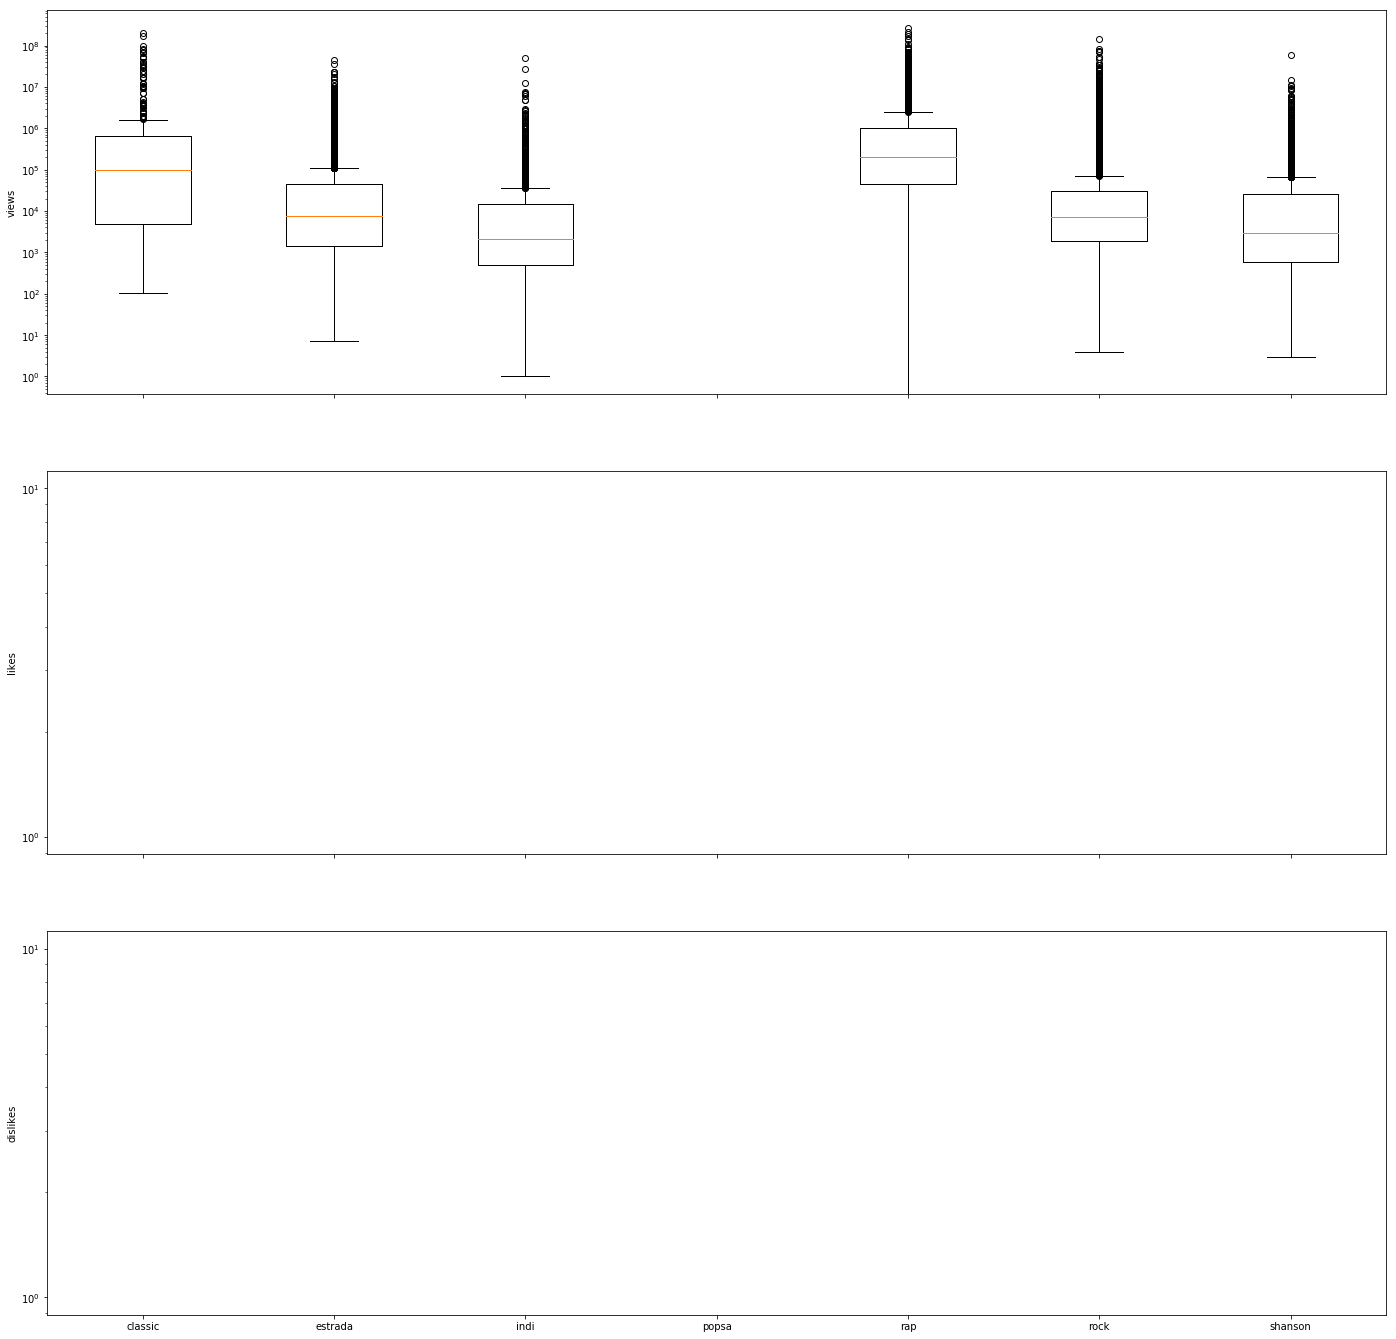

In [21]:
genres = []
views = []
likes = []
dislikes = []
for genre, stats in youtube.groupby('music_style'):
    views.append(stats.viewCount.values)
    likes.append(stats.likeCount.values)
    dislikes.append(stats.dislikeCount.values)
    genres.append(genre)

def boxplot(ax, data, labels):
    ax.boxplot(data)
    ax.set_xticklabels(labels)
    ax.set_yscale('log')

fig, axis = plt.subplots(nrows=3, ncols=1, figsize=(24, 24), sharey=False, sharex=True)
boxplot(axis[0], views, genres)
boxplot(axis[1], likes, genres)
boxplot(axis[2], dislikes, genres)
axis[0].set_ylabel('views')
axis[1].set_ylabel('likes')
axis[2].set_ylabel('dislikes')
fig.show()

### Violinplot
Виолончель/скрипка.

Разновидность boxplot'а, но вместо прямоугольного ящик рисуется скрипка, силуэт которой - плотность вероятности

/usr/local/lib/python3.7/site-packages/numpy/linalg/linalg.py:2093: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


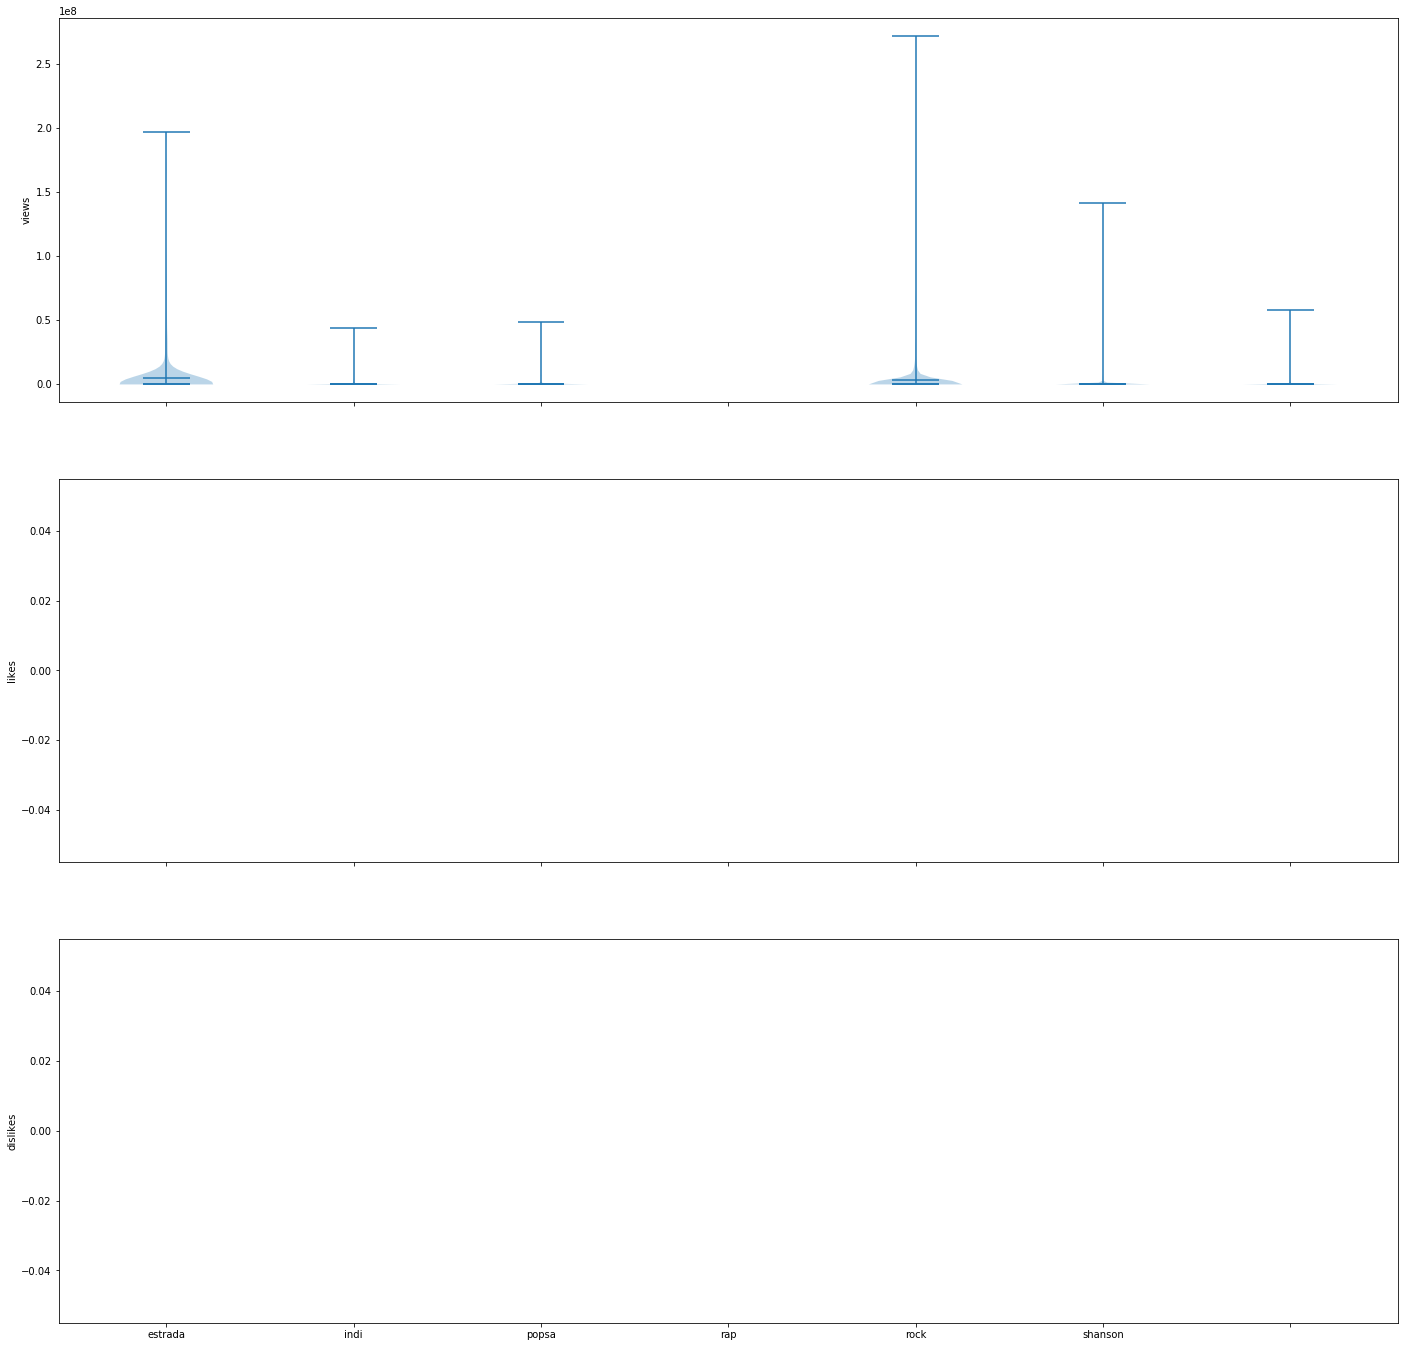

In [22]:
genres = []
views = []
likes = []
dislikes = []
for genre, stats in youtube.groupby('music_style'):
    views.append(stats.viewCount.values)
    likes.append(stats.likeCount.values)
    dislikes.append(stats.dislikeCount.values)
    genres.append(genre)

def violinplot(ax, data, labels):
    ax.violinplot(data, showmeans=True, showextrema=True, showmedians=True,)
    ax.set_xticklabels(labels)

fig, axis = plt.subplots(nrows=3, ncols=1, figsize=(24, 24), sharey=False, sharex=True)
violinplot(axis[0], views, genres)
violinplot(axis[1], likes, genres)
violinplot(axis[2], dislikes, genres)
axis[0].set_ylabel('views')
axis[1].set_ylabel('likes')
axis[2].set_ylabel('dislikes')
fig.show()